In [2]:
using DifferentialEquations
using Plots

In [3]:
function mutualism!(du, u, p, t)
    X, Y = u
    r1, r2, K1, K2, alpha, beta = p

    du[1] = r1 * X * (1 - (X / K1) + alpha * (Y / K2))
    du[2] = r2 * Y * (1 - (Y / K2) + beta * (X / K1))
end

mutualism! (generic function with 1 method)

In [5]:
# Параметры системы
r1 = 0.8    # Скорость роста вида 1
r2 = 0.6    # Скорость роста вида 2
K1 = 100.0  # Несущая способность среды для вида 1
K2 = 80.0   # Несущая способность среды для вида 2
alpha = 0.3     # Коэффициент положительного влияния вида 2 на вид 1
beta = 0.4     # Коэффициент положительного влияния вида 1 на вид 2
params = (r1, r2, K1, K2, alpha, beta)

(0.8, 0.6, 100.0, 80.0, 0.3, 0.4)

In [6]:
# Начальные условия
X_0 = 10.0
Y_0 = 8.0
u0 = [X_0, Y_0]

# Временной интервал
time = (0.0, 50.0)

# Решение системы дифференциальных уравнений
prob = ODEProblem(mutualism!, u0, time, params)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 98-element Vector{Float64}:
  0.0
  0.011093036762089694
  0.04453695881502802
  0.09127465842675891
  0.1465811601286678
  0.21320076583982472
  0.2887515799740764
  0.3734972506912551
  0.4660464838445551
  0.5659045485631319
  0.6721833592693607
  0.7843558149236148
  0.9018986643163809
  ⋮
 22.335845584610123
 23.374062825032187
 24.53070707187471
 25.832330354057248
 27.314709214232593
 29.02742063661537
 31.04127342362349
 33.46150565138268
 36.45100925742857
 40.27004846091787
 45.29848252194799
 50.0
u: 98-element Vector{Vector{Float64}}:
 [10.0, 8.0]
 [10.082845106574979, 8.05020075477081]
 [10.33642940378535, 8.203365083272645]
 [10.70057641124027, 8.42204865861025]
 [11.14654521661075, 8.687962403178812]
 [11.706051116295187, 9.018821778171832]
 [12.371061867929, 9.408434304541679]
 [13.157012881675529, 9.864333359202925]
 [14.065577717275701, 10.385917922178972]
 [15.107147537085877, 10.9776577304

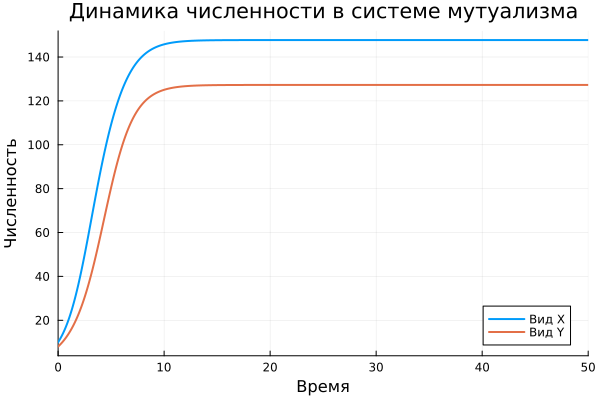

In [7]:
plt1 = plot(sol,
           linewidth=2,
           xlabel="Время",
           ylabel="Численность",
           label=["Вид X" "Вид Y"],
           title="Динамика численности в системе мутуализма",
           legend=:bottomright)